## carpet-timing

In [8]:
import CactusTool
import matplotlib.pyplot as plt

sims = [
#     {
#         'name': 'GW150914_28',
#         'path': '/Volumes/simulations/',
#         'label': 'ref_core120_c6',
#     },
#     {
#         'name': 'GW150914_core512_c8',
#         'path': '/Volumes/simulations/papp_cloud',
#         'label': 'GW150914_core512_c8',
#     },
#     {
#         'name': 'GW150914_core832_c4',
#         'path': '/Volumes/simulations/papp_cloud',
#         'label': 'GW150914_core832_c4',
#     },
    {
        'name': 'GW150914_N1_c1',
        'path': '/Volumes/simulations/HUST_paral',
        'label': 'GW150914_N1_c1',
    },
    {
        'name': 'GW150914_N1_c4',
        'path': '/Volumes/simulations/HUST_paral',
        'label': 'GW150914_N1_c4',
    },
    {
        'name': 'GW150914_N1_c13',
        'path': '/Volumes/simulations/HUST_paral',
        'label': 'GW150914_N1_c13',
    },
    {
        'name': 'GW150914_N2_c1',
        'path': '/Volumes/simulations/HUST_paral',
        'label': 'GW150914_N2_c1',
    },
    {
        'name': 'GW150914_N2_c4',
        'path': '/Volumes/simulations/HUST_paral',
        'label': 'GW150914_N2_c4',
    },
    {
        'name': 'GW150914_N4_c4',
        'path': '/Volumes/simulations/HUST_paral',
        'label': 'GW150914_N4_c4',
    },
    {
        'name': 'GW150914_N6_c4',
        'path': '/Volumes/simulations/HUST_paral',
        'label': 'GW150914_N6_c4',
    },
]








var = [
    'physical_time_per_hour', 
    'current_physical_time_per_hour', 
    'time_total', 
    'time_evolution', 
    'time_computing', 
    'time_communicating', 
    'time_io', 
    'evolution_steps_count', 
    'local_grid_points_per_second', 
    'total_grid_points_per_second', 
    'local_grid_point_updates_count', 
    'total_grid_point_updates_count', 
    'local_interior_points_per_second', 
    'total_interior_points_per_second', 
    'local_interior_point_updates_count', 
    'total_interior_point_updates_count', 
    'io_per_second', 
    'io_bytes_per_second', 
    'io_bytes_ascii_per_second', 
    'io_bytes_binary_per_second', 
    'io_count', 
    'io_bytes_count', 
    'io_bytes_ascii_count', 
    'io_bytes_binary_count', 
    'comm_per_second', 
    'comm_bytes_per_second', 
    'comm_count', 
    'comm_bytes_count', 
    'time_levels',
    'current_walltime',
    'syncs_count'
]

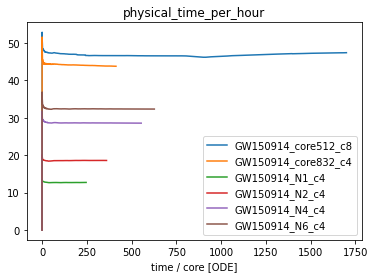

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

n = 0
for i in sims:
    sim = CactusTool.load(i['name'], i['path'], output='output-0000')
    dset = sim.Scalar(ftype='')['carpet-timing'].dsets(var[n])
    ax.set_title(var[n])
    ax.plot(dset[0], dset[1], label=i['label'])
    ax.set_xlabel('time / core [ODE]')
#     ax.set_ylabel('Day')
    ax.legend()

## Time

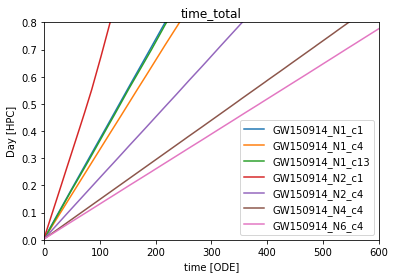

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in sims:
    sim = CactusTool.load(i['name'], i['path'], output='output-0000')
    dset = sim.Scalar(ftype='')['carpet-timing'].dsets('time_total')
    ax.set_title('time_total')
    ax.plot(dset[0], dset[1]/(60*60*24), label=i['label'])
    ax.set_xlabel('time [ODE]')
    ax.set_ylabel('Day [HPC]')
    ax.set_ylim((0,0.8))
    ax.set_xlim((0,600))
    ax.legend()
plt.savefig('/Users/liuyu/Downloads/HUST_paral.png')
# plt.axhline(0.8, color="black", linestyle="--",)

## Memory

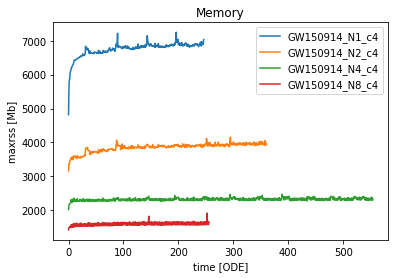

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in sims:
    if i['name'] == 'GW150914_N8_c4':
        sim = CactusTool.load(i['name'], i['path'], output='output-0001')
    else:
        sim = CactusTool.load(i['name'], i['path'], output='output-0000')
    dset = sim.Scalar(ftype='maximum')['systemstatistics-process_memory_mb'].dsets('maxrss_mb')
    ax.set_title('Memory')
    ax.plot(dset[0], dset[1], label=i['label'])
    ax.set_xlabel('time [ODE]')
    ax.set_ylabel('maxrss [Mb]')
    ax.legend()

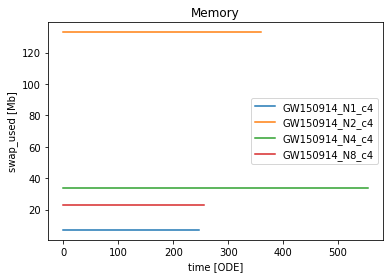

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in sims:
    if i['name'] == 'GW150914_N8_c4':
        sim = CactusTool.load(i['name'], i['path'], output='output-0001')
    else:
        sim = CactusTool.load(i['name'], i['path'], output='output-0000')
    dset = sim.Scalar(ftype='maximum')['systemstatistics-process_memory_mb'].dsets('swap_used_mb')
    ax.set_title('Memory')
    ax.plot(dset[0], dset[1], label=i['label'])
    ax.set_xlabel('time [ODE]')
    ax.set_ylabel('swap_used [Mb]')
    ax.legend()